<a href="https://colab.research.google.com/github/Ghatazhak/Capstone/blob/main/emailclasser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Classer
 A machine learning program that classifies emails as either spam or not spam. It uses a decision tree algorithm to determine whether an email is spam or not spam.


The model accuracy is: 92.91


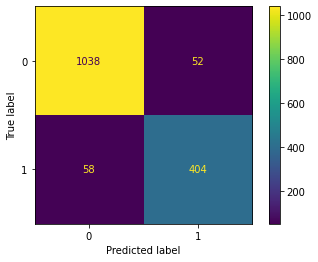

In [8]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import pandas as pd
# from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix
from matplotlib import pyplot


email_df = pd.read_csv('https://raw.githubusercontent.com/Ghatazhak/Capstone/main/emails.csv')

X = email_df.drop(columns=['Email No.','Prediction']) # Removed column one and the last column.
y = email_df[['Prediction']] # Only keep the last column.
X_t, X_te, y_t, y_te = train_test_split(X, y, test_size=0.3) # Split the data set for training and testing.

ml_model = DecisionTreeClassifier() # Decision Tree Algorithm model
ml_model.fit(X_t, y_t) # train the decision tree model.

predictions = ml_model.predict(X_te) # Run the test data through the model
accuracy = accuracy_score(y_te, predictions) # Checking predictions of model
print('The model accuracy is: %5.2f' %(accuracy * 100))

# metrics.plot_confusion_matrix(ml_model, X_te, y_te)
cm = confusion_matrix(y_te, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# scatter_matrix(y_t)
# y_t.hist()
# pyplot.show()

